In [2]:
!pip install plotly

  Using cached plotly-5.0.0-py2.py3-none-any.whl (19.1 MB)
  Using cached tenacity-7.0.0-py2.py3-none-any.whl (23 kB)


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image
import plotly.express as px

O cinema é parte importante da vida de grande parte da população. Quem não está com saudades de ir a uma sala de cinema e por cerca de 2 horas, esquecer dos problemas mundanos enquanto está imerso num mundo completamente diferente, projetado numa tela gigante à sua frente, comendo uma pipoquinha (ou um chocolate comprado nas Lojas Americanas)?


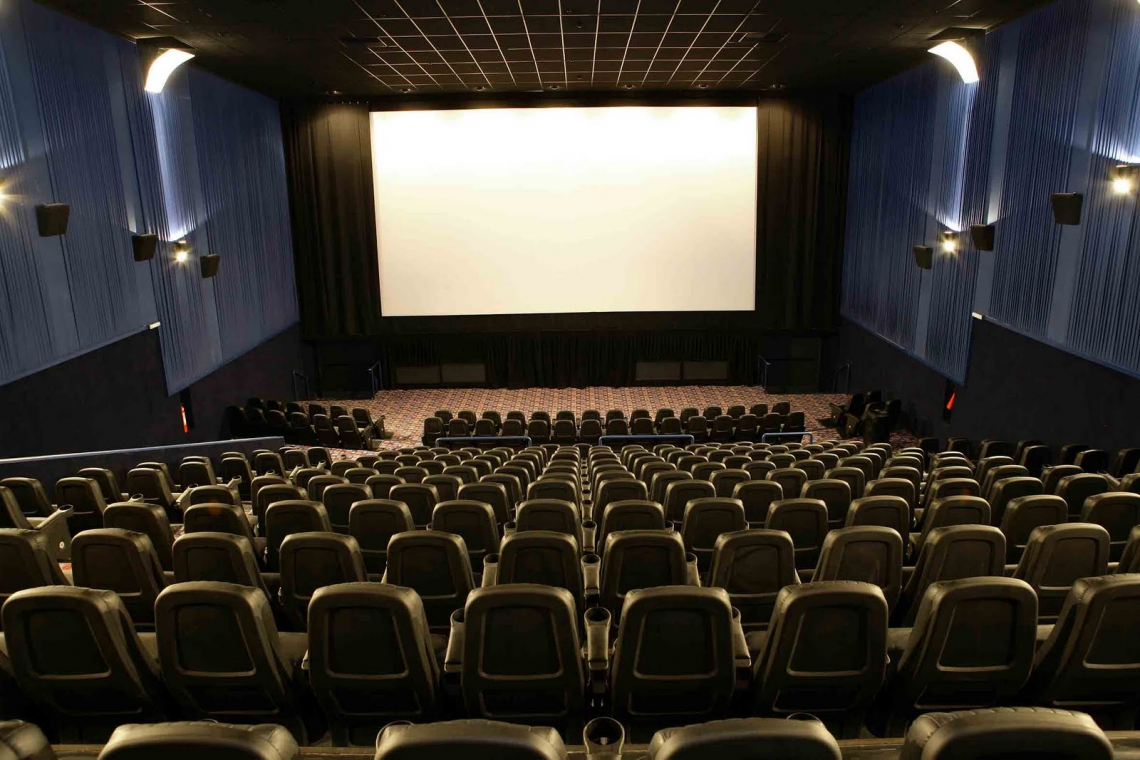

In [4]:
Image("imgs/cinema.jpg")

O cinema também é parte fundamental da cultura de um país, pois muitas vezes traz elementos culturais específicos de um país, o que pode causar estranheza em telespectadores de outras localidades, como expressões e piadas, os quais são muitas vezes adaptados na dublagem.

No filme Tá Dando Onda, por exemplo, temos o personagem João Frango, originalmente natural de Sheboygan, Wisconsin, EUA. No Brasil, porém, sua localidade foi adaptada, a fim de gerar mais humor ao público brasileiro, o que proporcionou uma das melhores cenas, mostrada abaixo:

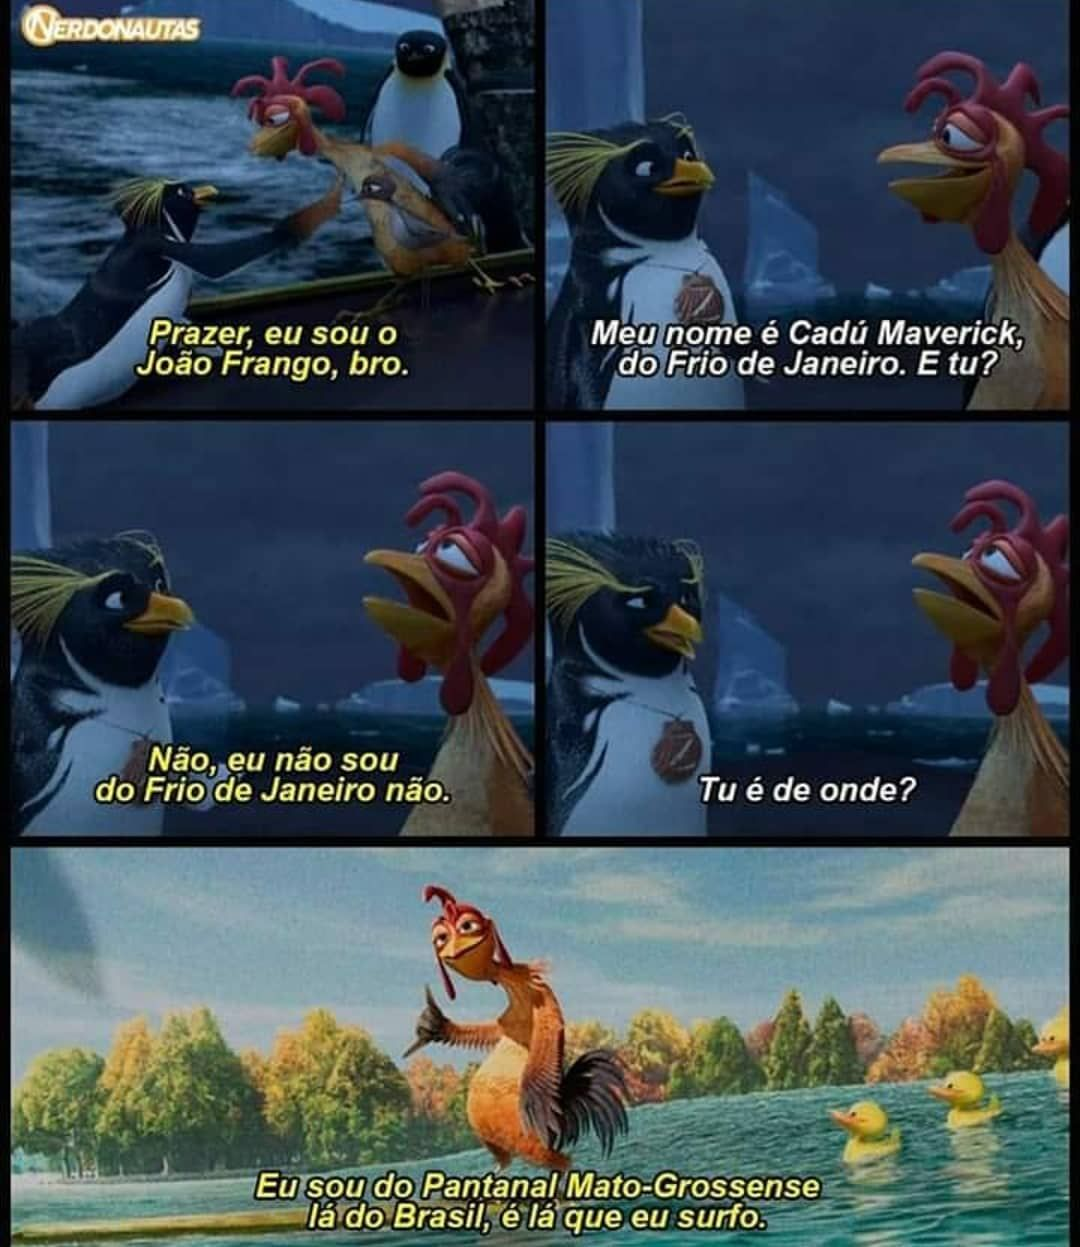

In [5]:
Image("imgs/ta_dando_onda.jpg")

Durante esse trabalho, usaremos uma base de dados retirada do site IMDb e disponibilizada no kaggle, por meio do link https://www.kaggle.com/stefanoleone992/imdb-extensive-dataset. Usando essa base de dados, faremos as seguintes análises:
##### 1. Filmes mais bem avaliados
##### 2. Produtoras mais bem avaliadas
##### 3.a. Gêneros mais bem avaliados
##### 3.b. Gêneros por sexo e faixa etária
##### 4. Diretores mais bem avaliados
##### 5.a. Países mais produziram filmes ao longo dos anos
##### 5.b. Quais países possuem os filmes mais bem avaliados
##### 6. Dração dos filmes ao longo do tempo 
##### 7. Correlação entre métricas e nota média

## Importação de Dataset de Filmes e de Avaliações

In [2]:
movies_df = pd.read_csv('Movies/IMDb movies.csv', low_memory=False)

In [3]:
ratings_df = pd.read_csv('Movies/IMDb ratings.csv')

## Limpeza dos Dados

### Dataset Filmes

No dataset de filmes, existe o campo "Year", que contém os anos de lançamento dos filmes. Existe uma amostra, porém, que não segue esse padrão, como mostrado abaixo

In [4]:
for year in movies_df.year:
    if len(year.split()) > 1:
        print(year)

TV Movie 2019


In [5]:
movies_df.loc[movies_df.year == 'TV Movie 2019']

,imdb_title_id,title,original_title,year,date_published,genre,duration,country,language,director,...,actors,description,avg_vote,votes,budget,usa_gross_income,worlwide_gross_income,metascore,reviews_from_users,reviews_from_critics
83917,tt8206668,Bad Education,Bad Education,TV Movie 2019,TV Movie 2019,"Biography, Comedy, Crime",108,USA,English,Cory Finley,...,"Hugh Jackman, Ray Romano, Welker White, Alliso...",The beloved superintendent of New York's Rosly...,7.1,23973,NaN,NaN,NaN,79.0,135.0,98.0


Para resolver o problema, substituiremos esse campo pelo ano correspondente, ou seja, 2019.

In [6]:
movies_df.loc[movies_df.year == 'TV Movie 2019', ['year']] = '2019'

#### Remoção Colunas

O dataset possui algumas colunas que não serão utilizadas nas análises, assim, serão removidas, por possuir muitos dados faltantes ou por serem redudantes

In [7]:
movies_df.columns

Index(['imdb_title_id', 'title', 'original_title', 'year', 'date_published',
       'genre', 'duration', 'country', 'language', 'director', 'writer',
       'production_company', 'actors', 'description', 'avg_vote', 'votes',
       'budget', 'usa_gross_income', 'worlwide_gross_income', 'metascore',
       'reviews_from_users', 'reviews_from_critics'],
      dtype='object')

In [8]:
movies_df.drop(columns=(['title', 'language', 'writer', 'actors', 'date_published'] 
                        + list(movies_df.columns[13:])), inplace=True)

### Dataset Avaliações

#### Remoção Colunas

Também removemos as colunas do dataset de avaliações que não serão utilizadas nas análises

In [9]:
ratings_df.columns

Index(['imdb_title_id', 'weighted_average_vote', 'total_votes', 'mean_vote',
       'median_vote', 'votes_10', 'votes_9', 'votes_8', 'votes_7', 'votes_6',
       'votes_5', 'votes_4', 'votes_3', 'votes_2', 'votes_1',
       'allgenders_0age_avg_vote', 'allgenders_0age_votes',
       'allgenders_18age_avg_vote', 'allgenders_18age_votes',
       'allgenders_30age_avg_vote', 'allgenders_30age_votes',
       'allgenders_45age_avg_vote', 'allgenders_45age_votes',
       'males_allages_avg_vote', 'males_allages_votes', 'males_0age_avg_vote',
       'males_0age_votes', 'males_18age_avg_vote', 'males_18age_votes',
       'males_30age_avg_vote', 'males_30age_votes', 'males_45age_avg_vote',
       'males_45age_votes', 'females_allages_avg_vote',
       'females_allages_votes', 'females_0age_avg_vote', 'females_0age_votes',
       'females_18age_avg_vote', 'females_18age_votes',
       'females_30age_avg_vote', 'females_30age_votes',
       'females_45age_avg_vote', 'females_45age_votes',
       

In [10]:
drop_columns = (['imdb_title_id', 'weighted_average_vote', 'median_vote'] 
                + list(ratings_df.columns[16:23:2]) + list(ratings_df.columns[26:33:2]) 
                + list(ratings_df.columns[36:43:2]) + list(ratings_df.columns[43:]))

In [11]:
ratings_df.drop(columns=drop_columns, inplace=True)

Algumas colunas possuem valores nan, correspondendo ao fato de que nenhuma pessoa que atende ao critério da coluna ter dado nota ao filme. Dessa forma, substituiremos esses valores por 0.

In [12]:
ratings_df.fillna(0, inplace=True)

### Concatenando os dois datasets em apenas um

In [13]:
rated_movies_df = pd.concat([movies_df, ratings_df], axis=1, 
                     verify_integrity=True)
rated_movies_df.shape

(85855, 36)

Das 85855 amostras, existem amostras que não possuem um ou mais dos campos a seguir nulos: country, director ou production_company. Faremos a remoção dessas linhas, o que levará a perda de cerca de 5 mil amostras. Além disso, definiremos um limiar mínimo para a quantidade total de votos recebido por um filme. 


-- Remover?

In [14]:
#rated_movies_df.dropna(inplace=True)
#rated_movies_df.shape

Ao analisar a média e a mediana, nota-se que a mediana é 484 e a média é 9493,5. Isso quer dizer que metade das amostras possuem até 484 votos, mas pela média, nota-se que há filmes com muito mais votos que 514. Decidimos, então, adotar os 20% dos filmes mais votados, correspondente ao 4º quintil, igual a 2722 votos, para as análises que utilizamos as notas médias.

In [15]:
median = rated_movies_df['total_votes'].median()
mean = rated_movies_df['total_votes'].mean()
fourth_quintile = rated_movies_df['total_votes'].quantile(0.8)
median, mean, fourth_quintile

(484.0, 9493.489604565837, 2722.0)

In [16]:
movies_total_votes_df = rated_movies_df[rated_movies_df.total_votes >= fourth_quintile]

## Analise dos Dados

### 1. Quais os filmes mais bem avaliados?

####  Geral

In [41]:
general_best_movies = movies_total_votes_df.sort_values('mean_vote', ascending=False)
fig = px.bar(general_best_movies[:5], y = 'original_title', x = 'mean_vote', orientation='h', text='mean_vote',height=300, width=800);
fig.show()

#### EUA

In [44]:
usa_best_movies = movies_total_votes_df[movies_total_votes_df.country == 'USA'].sort_values('mean_vote', ascending=False)
fig = px.bar(usa_best_movies[:5], y = 'original_title', x = 'mean_vote', orientation='h', text='mean_vote',height=300, width=800);
fig.show()

#### Brasil

In [46]:
brazil_best_movies = movies_total_votes_df[movies_total_votes_df.country == 'Brazil'].sort_values('mean_vote', ascending=False)
fig = px.bar(brazil_best_movies[:5], y = 'original_title', x = 'mean_vote', orientation='h', text='mean_vote',height=300, width=800);
fig.show()

### 2. Quais as produtoras mais bem avaliadas?

In [71]:
def feature_mean_vote(feature, dataframe=movies_total_votes_df, ranking=5, threshold_movies=10):
    movies_by_feature = dataframe[feature].copy()
    feature_dict = {}
    for feat in movies_by_feature.value_counts().index:
        if movies_by_feature.value_counts()[feat] > threshold_movies:
            feature_df = dataframe[movies_by_feature == feat]
            feature_notes_qnt = feature_df.loc[:,'votes_1':'votes_10':-1].sum().values
            feature_total_votes = feature_df.total_votes.sum()

            sum = 0
            for i in range (len(feature_notes_qnt)):
                sum += (i + 1) * feature_notes_qnt[i]
            
            feature_dict[feat] = round((sum / feature_total_votes), 1)
            
    final_df = pd.DataFrame.from_dict(feature_dict, orient='index', 
                                      columns=['Nota Media']).sort_values('Nota Media', 
                                                                          ascending=False).reset_index()
    final_df.columns= [feature, 'Nota Media']
    fig = px.bar(final_df[:ranking], x='Nota Media',y=feature , orientation='h', text='Nota Media', height=300, width=800);
    fig.show()

Removendo as amostras onde a produtora não foi especificada

In [58]:
companies_df = movies_total_votes_df[movies_total_votes_df.production_company.notna()]

In [72]:
feature_mean_vote('production_company', dataframe=companies_df, 
                  threshold_movies=50)

### 3. Gêneros
#### 3.a. Gêneros mais bem avaliados

In [73]:
movies_total_votes_df[movies_total_votes_df.genre.isna()]

,imdb_title_id,original_title,year,genre,duration,country,director,production_company,total_votes,mean_vote,...,males_0age_avg_vote,males_18age_avg_vote,males_30age_avg_vote,males_45age_avg_vote,females_allages_avg_vote,females_allages_votes,females_0age_avg_vote,females_18age_avg_vote,females_30age_avg_vote,females_45age_avg_vote


In [74]:
feature_mean_vote('genre', threshold_movies=50)

#### 3.b. Gêneros por Sexo e Faixa Etária

### 4. Diretores mais bem avaliados

In [75]:
movies_total_votes_df[movies_total_votes_df.director.isna()]

,imdb_title_id,original_title,year,genre,duration,country,director,production_company,total_votes,mean_vote,...,males_0age_avg_vote,males_18age_avg_vote,males_30age_avg_vote,males_45age_avg_vote,females_allages_avg_vote,females_allages_votes,females_0age_avg_vote,females_18age_avg_vote,females_30age_avg_vote,females_45age_avg_vote


In [76]:
feature_mean_vote('director', threshold_movies=10)

### 5. Países
#### 5.a. Produção de filmes por país ao longo do tempo

In [77]:
country_notna_df = rated_movies_df[rated_movies_df.country.notna()]

O algoritmo abaixo tem como objetivo contar quantos filmes foram produzidos por um país em determinado ano. Para isso, ele separa os filmes que foram produzidos por mais de 1 país, criando novas linhas com apenas 1 país em cada e então fazendo a contagem.

In [78]:
country_df = country_notna_df[['country', 'year', 'mean_vote']].copy()
new_rows = []
for index, row in country_df.iterrows():
    if len(row['country'].split(",")) > 1:
        countries = country_df.loc[index, 'country'].split(",")
        year = country_df.loc[index, 'year']
        mean_vote = country_df.loc[index, 'mean_vote']
        
        country_df.drop(index, inplace=True)
        
        for i in range (len(countries)):
            new_rows.append([countries[i], year, mean_vote])

new_rows = pd.DataFrame(new_rows, columns=['country', 'year', 'mean_vote'])
country_df = pd.concat([country_df, new_rows], ignore_index=True)

In [79]:
country_df = country_df.groupby(['country', 'year']).count()
country_df.reset_index(inplace=True)
country_df.sort_values(['year', 'country'], inplace=True, ignore_index=True)

In [80]:
fig = px.scatter_geo(country_df, locations="country", hover_name="country", size="mean_vote",
               animation_frame="year", projection="natural earth", 
                     locationmode='country names', width=900, height=1200)
fig.show()

#### 5.b. Países mais bem avaliados

In [ ]:
#feature_mean_vote('country', threshold_movies=200)

### 6. Duração dos filmes ao longo do tempo

In [83]:
fig = px.line(rated_movies_df.groupby('year').mean(), y = 'duration');
fig.show()

### 7. Correlação entre métricas e nota média de um filme